In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.tsa.api as smt  
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
import requests
import io
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
Newyork = pd.read_csv("Newyork.csv")
Newyork.head(2)
pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)
np.set_printoptions(threshold=np.inf)
pd.set_option('display.width', 1000)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Newyork.shape

(48377, 106)

In [4]:
df = Newyork.copy()

In [5]:
df.shape

(48377, 106)

In [6]:
column_names = df.columns
print(column_names)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], dtype='object', length=106)


In [7]:
# id - listing identifier that can be used to create a join with other files
# last_scraped - we will use it to calculate reviews_per_month
# listing_url - interesting if we want to analyse the pictures as well but out of scope otherwise
# scrape_id - same for all the records
# name - textual description already extracted as continous variables in other columns
# summary - as above
# space - as above
# description - as above
# experiences_offered - contains only none value
# neighborhood_overview - requires lot of preprocessing to turn into useful a feature
# notes - requires lot of preprocessing to turn into useful a feature
# transit - requires lot of preprocessing to turn into useful a feature
# access - requires lot of preprocessing to turn into useful a feature
# interaction - requires lot of preprocessing to turn into useful a feature
# house_rules - requires lot of preprocessing to turn into useful a feature
# thumbnail_url - contains no values
# medium_url - contains no values
# picture_url - interesting if we want to analyse the pictures as well but out of scope otherwise
# xl_picture_url - contains no values
# host_id - id that is not used anywhere else

In [8]:
df.drop('listing_url', inplace=True, axis=1) # dropping as it is not usable
df.drop('scrape_id', inplace=True, axis=1) # dropping as it is not usable
df.drop('name',inplace=True, axis=1) # dropping as it is not usable
df.drop('summary',inplace=True, axis=1) # dropping as it is not usable
df.drop('description',inplace=True, axis=1) # dropping as it is not usable
df.drop('experiences_offered',inplace=True, axis=1) # dropping as it is not usable
df.drop('neighborhood_overview',inplace=True, axis=1) # dropping as it is not usable
df.drop('notes',inplace=True, axis=1) # dropping as it is not usable
df.drop('access',inplace=True, axis=1) # dropping as it is not usable
df.drop('interaction',inplace=True, axis=1) # dropping as it is not usable
df.drop('house_rules',inplace=True, axis=1) # dropping as it is not usable
df.drop('thumbnail_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('medium_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('xl_picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_id',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_location',inplace=True, axis=1) # dropping as it is not usable

In [9]:
df.head()

,id,last_scraped,space,transit,host_url,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,https://www.airbnb.com/users/show/7192,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/7192/profile_...,https://a0.muscache.com/im/users/7192/profile_...,East Harlem,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"New York, NY, United States",East Harlem,East Harlem,Manhattan,New York,NY,10029,New York,"New York, NY",US,United States,40.79851,-73.94399,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,

In [10]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_url', 'host_name', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'm

In [11]:
# From the next 20 columns we will keep the following:

# host_name - can be used to identify words associated with the host in reviews
# host_since - can be used to calculate host experience based on duration since the first listing
# host_location - we can use it to establish if host is local or not
# host_about - since its only a text we will count number of characters
# host_is_superhost - categorical t or f - describing highly rated and relaible hosts - https://www.airbnb.co.uk/superhost
# host_has_profile_pic - categorical t or f - profiles with pictures are seen as more credible
# host_identity_verified - categorical t or f - another credibility metric

# And remove all the below:

# host_url - host profile is out of scope
# host_response_time - this value could be useful but contains high percentage of N/A and is contained within score_communication
# host_response_rate - same as above
# host_acceptance_rate - eaither NA or blank
# host_thumbnail_url - host picture is out of scope
# host_picture_url - host picture is out of scope
# host_neighbourhood - host_location to be instead
# host_listings_count - we will use more accurate calculated_host_listings_count
# host_total_listings_count - as above
# host_verifications - list of host verification methods - information already contained in host_identity_verified
# street - neighbourhood_cleansed will be used instead
# neighbourhood - neighbourhood_cleansed will be used instead

In [12]:
df.drop('host_url', inplace=True, axis=1) # dropping as it is not usable
df.drop('host_response_time', inplace=True, axis=1) # dropping as it is not usable
df.drop('host_response_rate',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_acceptance_rate',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_thumbnail_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_neighbourhood',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_listings_count',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_total_listings_count',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_verifications',inplace=True, axis=1) # dropping as it is not usable
df.drop('neighbourhood',inplace=True, axis=1) # dropping as it is not usable

In [13]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,New York,NY,10029,New York,"New York, NY",US,United States,40.79851,-73.94399,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,New York,NY,10016,New York,"New York, NY",US,United States,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",NaN,$200.00,NaN,NaN,$300.00,$125.00,2,$100.00,3,21,3,3,21,21,3.0,21.0,today,t,3,3,13,13,2019-09-13,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyves

In [14]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_r

In [15]:
# From the next 20 columns we will keep the following:

# neighbourhood_cleansed - we will use only for visualisation due to number of neighbourhoods while we use gruoupped neighbourhoods instead
# neighbourhood_group_cleansed - categorical value which will be used to identify most popular parts of Barclona
# latitude - we will use it later to visualise the data on the map
# longitude - we will use it later to visualise the data on the map
# property_type - categorical variable
# room_type - categorical variable
# accommodates - discrete value describing property
# bathrooms - another discrete value describing property
# bedrooms - another discrete value describing property
# beds - another discrete value describing property
# bed_type - categorical value describing property
# amenities - due to number of unique features (over 100) we will only concentrate on the total number of amenities
# And remove all the below:

# city - we already know the city
# state - and region being Catalonia
# zipcode - we will use neighbourhood
# market - it is mainly Barcelona
# smart_location - it is mainly Barcelona
# country_code - we already know the country
# country - as above
# is_location_exact - unimportant as it could be inacurate up to 150 meters http://insideairbnb.com/about.html#disclaimers

In [16]:
df.drop('city', inplace=True, axis=1) # dropping as it is not usable
df.drop('state', inplace=True, axis=1) # dropping as it is not usable
df.drop('zipcode',inplace=True, axis=1) # dropping as it is not usable
df.drop('market',inplace=True, axis=1) # dropping as it is not usable
df.drop('smart_location',inplace=True, axis=1) # dropping as it is not usable
df.drop('country_code',inplace=True, axis=1) # dropping as it is not usable
df.drop('country',inplace=True, axis=1) # dropping as it is not usable
df.drop('is_location_exact',inplace=True, axis=1) # dropping as it is not usable

In [17]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",NaN,$200.00,NaN,NaN,$300.00,$125.00,2,$100.00,3,21,3,3,21,21,3.0,21.0,today,t,3,3,13,13,2019-09-13,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",NaN,$60.00,NaN,NaN,$450.00,$0.00,1,$30.00,45,730,45,45,730,730,45.0,730.0,20 months ago,t,0,0,0,0,2019-09-13,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_wit

In [18]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_ch

In [19]:
# From the next 20 columns we will keep the following:

# price - price per night for number of included guests
# security_deposit - another continous value assiociated with the cost
# cleaning_fee - additional cost at the top of rent
# guests_included - descrete value which we will use to evaluate the cost per person
# extra_people - cost of additional person per night
# minimum_nights - another discrete value that is cost related. Listing with high value of minimum nights are likely sublettings
# first_review - we will use it to calculate reviews_per_month
# last_review - we will use this field to filter out no longer active listings
# number_of_reviews - total number of reviews in entire listing history
# And remove all the below:

# square_feet - could be used to evaluate the property size but most of the values are missing
# weekly_price - mostly blank so we will use price instead
# monthly_price - mostly blank so we will use price instead
# maximum_nights - most of the values are above 30 days suggesting its used as an open bracket
# calendar_updated - we are not interested in future data that is a subject to daily updates
# has_availability - as above
# availability_30 - as above
# availability_60 - as above
# availability_90 - as above
# availability_365 - as above
# calendar_last_scraped - as above

In [20]:
df.drop('square_feet', inplace=True, axis=1) # dropping as it is not usable
df.drop('weekly_price', inplace=True, axis=1) # dropping as it is not usable
df.drop('monthly_price',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('calendar_updated',inplace=True, axis=1) # dropping as it is not usable
df.drop('has_availability',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_30',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_60',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_90',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_365',inplace=True, axis=1) # dropping as it is not usable
df.drop('calendar_last_scraped',inplace=True, axis=1) # dropping as it is not usable

In [21]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,3,3,7,7,3.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,1,1,730,730,1.0,730.0,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,10,10,120,120,10.0,120.0,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,3,3,21,21,3.0,21.0,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,45,45,730,730,45.0,730.0,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.39


In [22]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
   

In [23]:
# From the final set of columns we will keep the following:

# review_scores_accuracy - discrete value - numbers between 2 and 10
# review_scores_cleanliness - discrete value - numbers between 2 and 10
# review_scores_checkin - discrete value - numbers between 2 and 10
# review_scores_communication - discrete value - numbers between 2 and 10
# review_scores_location - discrete value - numbers between 2 and 10
# review_scores_value - discrete value - numbers between 2 and 10
# instant_bookable - categorical value - t or false
# cancellation_policy - ordinal value with 5 categories that can be ordered from lowest to highest level of flexibility
# require_guest_profile_picture - categorical value - t or false
# require_guest_phone_verification categorical value - t or false
# calculated_host_listings_count - continious value which is actual number of host listings - another metric to measure host experience or to distinguish buisness from individual
# And remove all the below:

# review_scores_rating - this value is calculated as weighted sum of other scores
# requires_license - all values are t
# license - textual value that is mostly null
# jurisdiction_names - contains only nulls
# is_business_travel_ready - contains one value of f
# reviews_per_month - we will re-calculate this field using our formula

In [24]:
df.drop('review_scores_rating', inplace=True, axis=1) # dropping as it is not usable
df.drop('requires_license', inplace=True, axis=1) # dropping as it is not usable
df.drop('license',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_minimum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_minimum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_nights_avg_ntm',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_nights_avg_ntm',inplace=True, axis=1) # dropping as it is not usable
df.drop('jurisdiction_names',inplace=True, axis=1) # dropping as it is not usable
df.drop('is_business_travel_ready',inplace=True, axis=1) # dropping as it is not usable
df.drop('reviews_per_month',inplace=True, axis=1) # dropping as it is not usable

In [25]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,0,1,0
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,67,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1,1,0,0
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1,1,0,0
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,10,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1,1,0,0
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,0,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1,0,1,0


In [26]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], dtype='object')


In [27]:
df.drop('number_of_reviews_ltm', inplace=True, axis=1) # dropping as it is not usable
df.drop('street', inplace=True, axis=1) # dropping as it is not usable
df.drop('transit',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_entire_homes',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_private_rooms',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_shared_rooms',inplace=True, axis=1) # dropping as it is not usable
df.drop('space',inplace=True, axis=1) # dropping as it is not usable

In [28]:
df.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,3647,2019-09-13,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
2,5022,2019-09-13,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
4,5121,2019-09-13,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1


In [29]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count'], dtype='object')


In [30]:
df_sel = df.copy()

In [31]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,3647,2019-09-13,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
2,5022,2019-09-13,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
4,5121,2019-09-13,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1


In [32]:
df_sel.drop(df_sel[df_sel['number_of_reviews'] <= 0].index, inplace = True) 
# dropping all values less than or equal to 0 as it is equal to NAN or NA

In [33]:
df_sel['number_of_reviews'].unique()

array([279,   9,  75,  49, 443, 118,  94, 161,  54, 198, 171, 116,  27,
       160, 203, 277,  62, 134,  74,  96,  21,  58,  30, 248,  95, 206,
       172,  67, 239, 218, 253,  15,  25,  84, 100,  11, 258,  12, 138,
       121,  80, 349,  19, 108,  20, 298, 142,  23,  44,   5, 143, 192,
         4, 357, 155, 110, 197,  50,  52, 109, 146,  63,  55,  73,  17,
        61, 201,   2, 178, 175,  22, 168, 123,  82,   1,  31, 139,  46,
       339,  88, 164,  29, 177, 342, 469,   7,  38, 331, 356,  16,  14,
       156, 266,  78, 194,   3, 428, 238,  85, 127, 243,  28,  34, 135,
       126, 240, 322, 305, 152,  59, 234, 193,  87, 117, 219,  18, 222,
        33,  53, 128,  51, 208, 113, 290, 378,  10,   6,  39, 369, 236,
       211, 261, 115, 130,  37, 213,  71, 225, 205,  98, 231, 475, 184,
        92, 151,  81, 183, 187, 125, 106, 360, 448,  45, 259, 145,  36,
       292, 233,  64, 227,  72,  56,  99,  65, 133,  48, 122,  40,  32,
        70,  69,  26, 209, 232, 295, 409, 185,   8,  35,  66, 39

In [34]:
df_sel['price']=df_sel['price'].str.replace('$','')
df_sel['price']=df_sel['price'].str.replace(',','')
df_sel['price']=df_sel['price'].str.replace('.','').astype(float)

In [35]:
df_sel['extra_people']=df_sel['extra_people'].str.replace('$','')
df_sel['extra_people']=df_sel['extra_people'].str.replace(',','')
df_sel['extra_people']=df_sel['extra_people'].str.replace('.','').astype(float)

In [36]:
# security_deposit - conversion from $ to numeric values
df_sel['security_deposit']=df_sel['security_deposit'].str.replace('$','')
df_sel['security_deposit']=df_sel['security_deposit'].str.replace(',','')
df_sel['security_deposit']=df_sel['security_deposit'].str.replace('.','').astype(float)

In [37]:
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace('$','')
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace(',','')
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace('.','').astype(float)

In [38]:
df_sel['security_deposit'].isnull().sum()

11838

In [39]:
df_sel['cleaning_fee'].isnull().sum()

6315

In [40]:
df_sel['cleaning_fee'] = df_sel ['cleaning_fee'].fillna(df_sel['cleaning_fee'].mean()).astype(float)

In [41]:
df_sel['cleaning_fee'].isnull().sum()

0

In [42]:
df_sel['security_deposit'] = df_sel ['security_deposit'].fillna(df_sel['security_deposit'].mean()).astype(float)

In [43]:
df_sel['security_deposit'].isnull().sum()

0

In [44]:
df_sel['host_about'].isnull().sum()

13914

In [45]:
df_sel['host_about'] = df_sel.host_about.fillna('')

In [46]:
df_sel['host_about'].isnull().sum()

0

In [47]:
df_sel1 = df_sel.copy()

In [48]:
df_sel = df_sel.dropna()

In [49]:
df_sel.isnull().sum()

id                                  0
last_scraped                        0
host_name                           0
host_since                          0
host_about                          0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
number_of_re

In [50]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,f,t,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,f,strict_14_with_grace_period,f,f,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,f,t,t,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,t,t,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,f,t,t,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,1


In [51]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df_sel['host_is_superhost']= label_encoder.fit_transform(df_sel['host_is_superhost'])

In [52]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,t,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,f,strict_14_with_grace_period,f,f,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,t,t,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,t,t,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,t,t,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,1


In [53]:
df_sel['host_has_profile_pic'] = label_encoder.fit_transform(df_sel['host_has_profile_pic'])

In [54]:
df_sel['host_identity_verified'] = label_encoder.fit_transform(df_sel['host_identity_verified'])

In [55]:
df_sel['instant_bookable'] = label_encoder.fit_transform(df_sel['instant_bookable'])

In [56]:
df_sel['require_guest_profile_picture'] = label_encoder.fit_transform(df_sel['require_guest_profile_picture'])

In [57]:
df_sel['require_guest_phone_verification'] = label_encoder.fit_transform(df_sel['require_guest_phone_verification'])

In [58]:
df_sel['cancellation_policy'] = label_encoder.fit_transform(df_sel['cancellation_policy'])

In [59]:
df_sel['bed_type'] = label_encoder.fit_transform(df_sel['bed_type'])

In [60]:
df_sel['room_type'] = label_encoder.fit_transform(df_sel['room_type'])

In [61]:
df_sel['neighbourhood_group_cleansed'] = label_encoder.fit_transform(df_sel['neighbourhood_group_cleansed'])

In [62]:
df_sel['property_type'] = label_encoder.fit_transform(df_sel['property_type'])

In [63]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1


In [64]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37659 entries, 1 to 48176
Data columns (total 40 columns):
id                                  37659 non-null int64
last_scraped                        37659 non-null object
host_name                           37659 non-null object
host_since                          37659 non-null object
host_about                          37659 non-null object
host_is_superhost                   37659 non-null int32
host_has_profile_pic                37659 non-null int32
host_identity_verified              37659 non-null int32
neighbourhood_cleansed              37659 non-null object
neighbourhood_group_cleansed        37659 non-null int32
latitude                            37659 non-null float64
longitude                           37659 non-null float64
property_type                       37659 non-null int32
room_type                           37659 non-null int32
accommodates                        37659 non-null int64
bathrooms                  

In [65]:
df_sel.select_dtypes(include='object').columns

Index(['last_scraped', 'host_name', 'host_since', 'host_about', 'neighbourhood_cleansed', 'amenities', 'first_review', 'last_review'], dtype='object')

In [66]:
# listing_duration = 
df_sel['last_review']= pd.to_datetime(df_sel['last_review'])
df_sel['first_review']= pd.to_datetime(df_sel['first_review'])
df_sel['listing_duration'] = df_sel['last_review'] - df_sel['first_review']

In [67]:
# hosting_duration = 
df_sel['host_since']= pd.to_datetime(df_sel['host_since'])
df_sel['hosting_duration'] = df_sel['last_review'] - df_sel['host_since']

In [68]:
# host_about_len = 
df_sel['host_about_len']=df_sel['host_about'].str.replace('NA','0')

In [69]:
df.drop('host_about',inplace=True, axis=1) # dropping as it is not usable

In [70]:
# price_per_person - (price/accommodates)
df_sel['price_per_person'] =df_sel['price'] / df_sel['accommodates']

In [71]:
a_longitude= 40.7128
a_latitude= 74.0060

In [72]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [73]:
for index, row in df_sel.iterrows():
    df_sel.loc[index, 'distance'] = haversine(a_longitude, a_latitude, row['longitude'], row['latitude'])

In [74]:
df_sel.head(5)

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,listing_duration,hosting_duration,host_about_len,price_per_person,distance
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1,1794 days,3917 days,Laid-back bi-coastal actor/professor/attorney.,2966.666667,6373.457483
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1,3744 days,3821 days,"I'm an artist, writer, traveler, and a native ...",10000.000000,6367.205106
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1,3765 days,3829 days,I used to work for a financial industry but no...,3950.000000,6365.626879
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,2874 days,3088 days,Welcome to family life with my oldest two away...,7900.000000,6361.269989
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1,2669 days,2686 days,I'm a writer who came to NYC for graduate scho...,5800.000000,6369.442641


In [75]:
df_sel['last_scraped']= pd.DatetimeIndex(df_sel.last_scraped)
df_sel['first_review']= pd.DatetimeIndex(df_sel.first_review)
df_sel['last_review']= pd.DatetimeIndex(df_sel.last_review)
df_sel['host_since']= pd.DatetimeIndex(df_sel.host_since)

In [76]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,listing_duration,hosting_duration,host_about_len,price_per_person,distance
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1,1794 days,3917 days,Laid-back bi-coastal actor/professor/attorney.,2966.666667,6373.457483
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1,3744 days,3821 days,"I'm an artist, writer, traveler, and a native ...",10000.000000,6367.205106
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1,3765 days,3829 days,I used to work for a financial industry but no...,3950.000000,6365.626879
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,2874 days,3088 days,Welcome to family life with my oldest two away...,7900.000000,6361.269989
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1,2669 days,2686 days,I'm a writer who came to NYC for graduate scho...,5800.000000,6369.442641


In [77]:
df_sel = df_sel.drop(['last_scraped','host_name','host_since','host_about','neighbourhood_cleansed','amenities','first_review','last_review','listing_duration','hosting_duration','host_about_len'], axis=1)

In [78]:
df_sel.head()

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,distance
1,3831,0,1,1,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,8900.0,50000.000000,6331.088211,1,0.0,1,279,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1,2966.666667,6373.457483
3,5099,0,1,0,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,20000.0,30000.000000,12500.000000,2,10000.0,3,75,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1,10000.000000,6367.205106
5,5178,0,1,0,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,7900.0,24972.470991,1500.000000,1,1200.0,2,443,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1,3950.000000,6365.626879
6,5203,0,1,1,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,7900.0,24972.470991,6331.088211,1,0.0,2,118,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,7900.000000,6361.269989
7,5222,0,1,1,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,11600.0,50000.000000,7500.000000,2,1500.0,30,94,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1,5800.000000,6369.442641


In [79]:
X=df_sel.drop(['price'],1)
y = df_sel['price']

In [80]:
X.head(5)

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,distance
1,3831,0,1,1,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,50000.000000,6331.088211,1,0.0,1,279,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1,2966.666667,6373.457483
3,5099,0,1,0,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,30000.000000,12500.000000,2,10000.0,3,75,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1,10000.000000,6367.205106
5,5178,0,1,0,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,24972.470991,1500.000000,1,1200.0,2,443,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1,3950.000000,6365.626879
6,5203,0,1,1,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,24972.470991,6331.088211,1,0.0,2,118,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,7900.000000,6361.269989
7,5222,0,1,1,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,50000.000000,7500.000000,2,1500.0,30,94,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1,5800.000000,6369.442641


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26361, 33)
(11298, 33)
(11298,)


In [82]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.6987829570744384
R^2 score for test: 0.7899394341859203


In [83]:
X.columns

Index(['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'price_per_person', 'distance'], dtype='object')

In [84]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X=df_sel.drop(['price','id'],1)
y = df_sel['price']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3213.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:59:04   Log-Likelihood:            -4.0117e+05
No. Observations:               37659   AIC:                         8.024e+05
Df Residuals:                   37626   BIC:                         8.027e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.026e+10   8.35e+08     12.282      0.000    8.62e+09    1.19e+10
host_is_superhost                  314.5517    136.069      2.312      0.021      47.853     581.251
host_has_profile_pic              1309.5827   1254.441      1.044      0.297   -1149.156    3768.322
host_identity_verified              66.2476    110.712      0.598      0.550    -150.751     283.246
neighbourhood_group_cleansed      -237.5717     90.005     -2.640      0.008    -413.984     -61.160
latitude                         -1.232e+08      1e+07    -12.284      0.000   -1.43e+08   -1.04e+08
longitude                        -2.912e+07   2.37e+06    -12.293      0.000   -3.38e+07   -2.45e+07
property_type                       44.8329      6.257      7.165      0.000      32.568      57.098
room_type                         -609.5209     65.653     -9.284      0.000    -738.203    -480.839
accommodates                      3670.6978     52.598     69.788      0.000    3567.604    3773.791
bathrooms                         4108.6580    143.932     28.546      0.000    3826.548    4390.768
bedrooms                          1168.8220    105.696     11.058      0.000     961.656    1375.988
beds                              -900.3635     75.385    -11.944      0.000   -1048.119    -752.608
bed_type                           -86.7083    174.950     -0.496      0.620    -429.615     256.199
security_deposit                     0.0176      0.001     11.787      0.000       0.015       0.021
cleaning_fee                         0.3154      0.014     22.237      0.000       0.288       0.343
guests_included                   -380.1315     58.480     -6.500      0.000    -494.754    -265.509
extra_people                         0.0215      0.023      0.948      0.343      -0.023       0.066
minimum_nights                     -22.4812      2.944     -7.635      0.000     -28.252     -16.710
number_of_reviews                   -6.4317      1.157     -5.557      0.000      -8.700      -4.163
review_scores_accuracy             117.0185     98.803      1.184      0.236     -76.638     310.675
review_scores_cleanliness          259.5779     66.735      3.890      0.000     128.776     390.380
review_scores_checkin             -315.5023    103.073     -3.061      0.002    -517.528    -113.477
review_scores_communication       -127.0571    105.222     -1.208      0.227    -333.295      79.181
review_scores_location             397.5984     84.739      4.692      0.000     231.508     563.689
review_scores_value                -39.8969     89.991     -0.443      0.658    -216.281     136.488
instant_bookable                   115.7365    112.946      1.025      0.306    -105.641     337.115
cancellation_policy               -101.1928     42.84

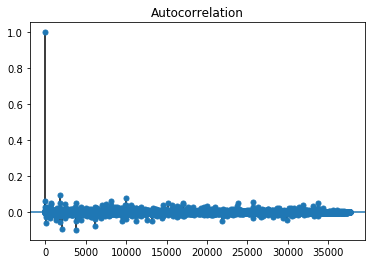

In [87]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid)
acf.show()

In [89]:
import scipy.stats as stats

In [90]:
print(stats.jarque_bera(lin_reg.resid))

(2862431836.2239127, 0.0)


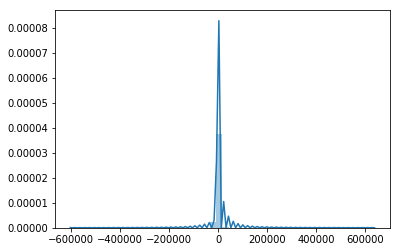

In [91]:
sns.distplot(lin_reg.resid)

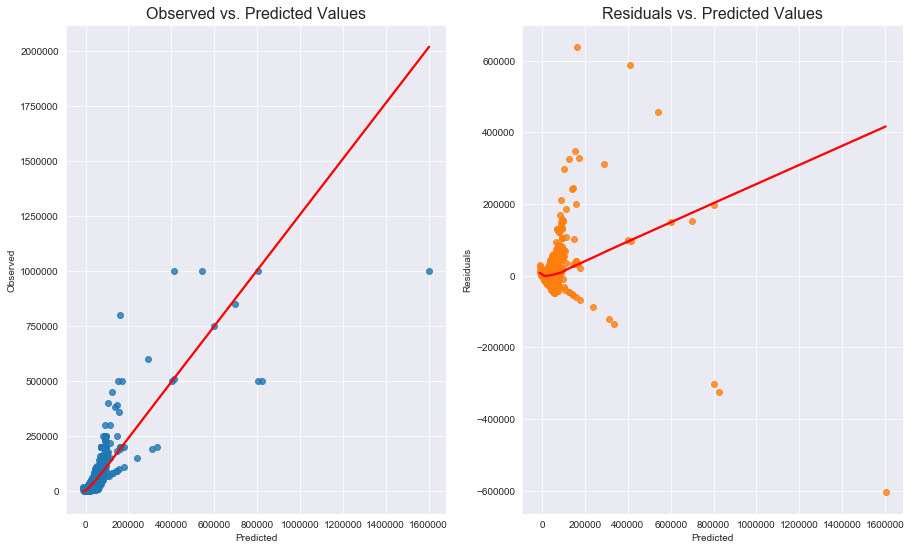

In [92]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

In [93]:
print(sm.stats.linear_rainbow(res = lin_reg,frac = 0.5))


(2.1130257453756376, 0.0)


In [94]:
lin_reg.resid.mean()   # it is close to zero linearity is present

8.278470693542895e-06

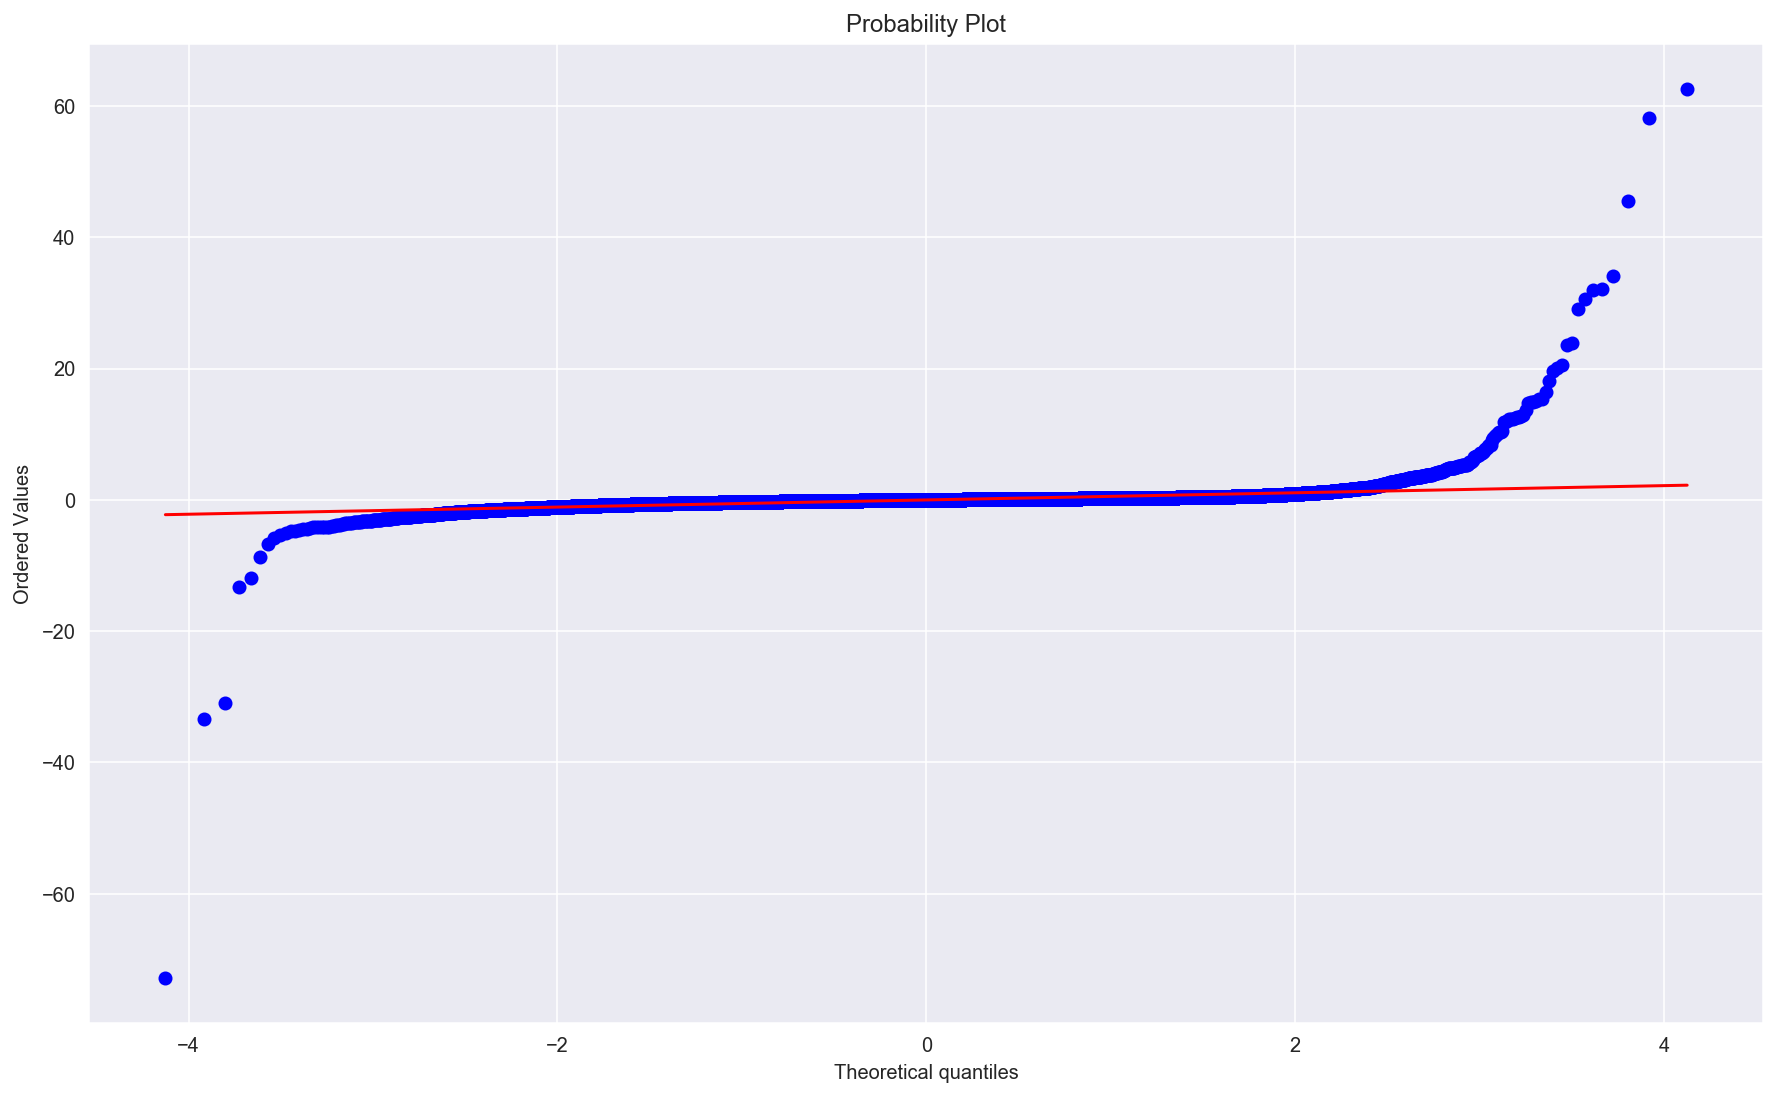

In [96]:
%config InlineBackend.figure_format ='retina'

import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

[('F statistic', 0.4264053957025792), ('p-value', 0.9999999999999999)]

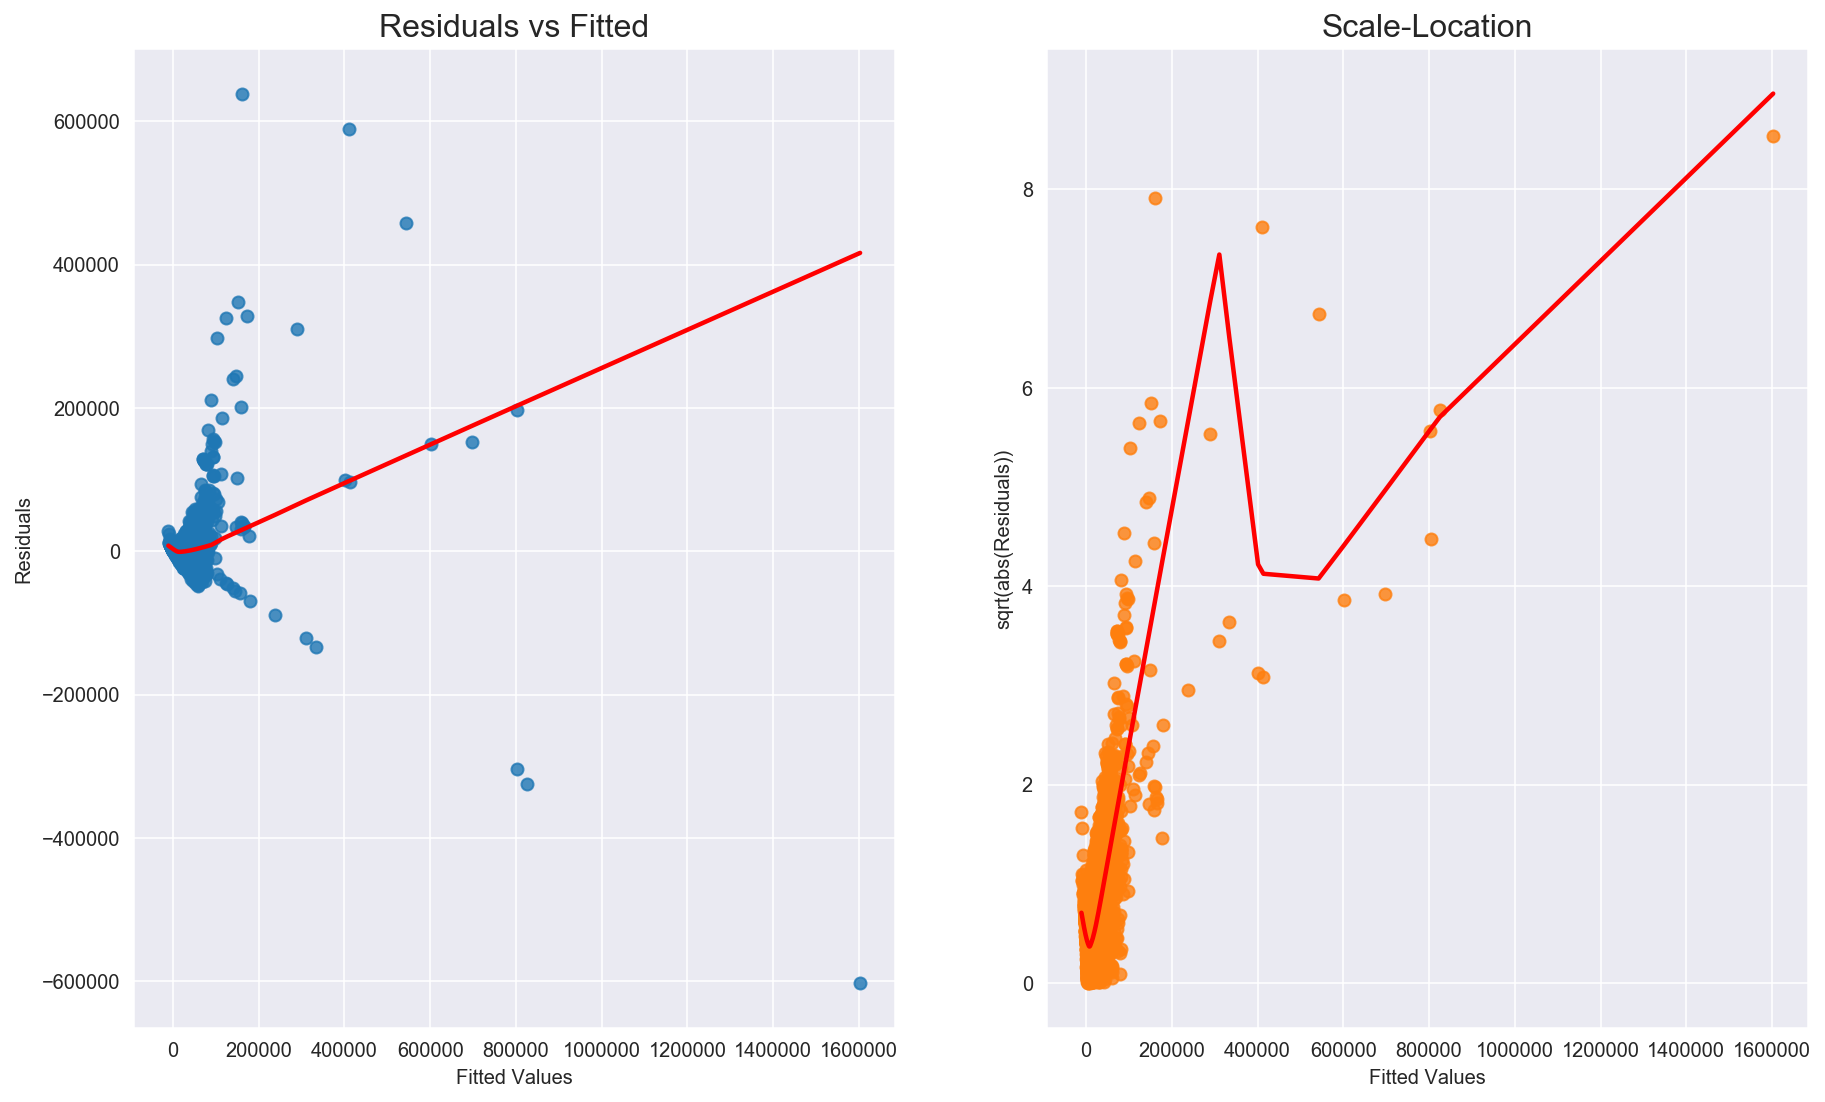

In [97]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [ ]:
# Pvalue is more than alpha so there may homo scadescity in the model

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,distance
vif,1.195322,1.003533,1.10023,1.651666,1.114435e+08,4.566715e+06,1.14069,1.637134,3.585254,1.313244,2.226904,2.693243,1.009693,1.177967,1.711408,1.789934,1.157918,1.050417,1.198668,2.442046,1.857268,1.929511,2.104934,1.476909,2.430611,1.078467,1.098204,2.745154,2.757812,1.096901,1.057754,1.198050e+08


In [85]:
X=df_sel.drop(['price','latitude'],1)
y = df_sel['price']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26361, 32)
(11298, 32)
(11298,)


In [87]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X=df_sel.drop(['price','id','latitude'],1)
y = df_sel['price']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     3299.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:59:37   Log-Likelihood:            -4.0124e+05
No. Observations:               37659   AIC:                         8.026e+05
Df Residuals:                   37627   BIC:                         8.028e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -1.163e+06   9.62e+04    -12.095      0.000   -1.35e+06   -9.75e+05
host_is_superhost                  265.4501    136.281      1.948      0.051      -1.664     532.564
host_has_profile_pic              1075.5496   1256.793      0.856      0.392   -1387.798    3538.897
host_identity_verified              83.6363    110.923      0.754      0.451    -133.776     301.049
neighbourhood_group_cleansed       385.6717     74.489      5.178      0.000     239.671     531.672
longitude                        -2.265e+04   1273.598    -17.786      0.000   -2.51e+04   -2.02e+04
property_type                       44.3670      6.270      7.076      0.000      32.078      56.656
room_type                         -679.8752     65.533    -10.375      0.000    -808.322    -551.429
accommodates                      3668.6623     52.702     69.611      0.000    3565.364    3771.960
bathrooms                         4113.5305    144.218     28.523      0.000    3830.860    4396.201
bedrooms                          1168.4952    105.906     11.033      0.000     960.917    1376.074
beds                              -935.7910     75.479    -12.398      0.000   -1083.732    -787.850
bed_type                           -83.1689    175.298     -0.474      0.635    -426.758     260.420
security_deposit                     0.0178      0.001     11.910      0.000       0.015       0.021
cleaning_fee                         0.3268      0.014     23.047      0.000       0.299       0.355
guests_included                   -395.6732     58.583     -6.754      0.000    -510.497    -280.850
extra_people                         0.0289      0.023      1.271      0.204      -0.016       0.074
minimum_nights                     -22.6745      2.950     -7.686      0.000     -28.457     -16.892
number_of_reviews                   -6.0892      1.159     -5.253      0.000      -8.361      -3.817
review_scores_accuracy              93.7759     98.982      0.947      0.343    -100.231     287.782
review_scores_cleanliness          259.5607     66.868      3.882      0.000     128.498     390.623
review_scores_checkin             -340.7214    103.257     -3.300      0.001    -543.109    -138.334
review_scores_communication       -129.3496    105.431     -1.227      0.220    -335.998      77.298
review_scores_location             539.5831     84.114      6.415      0.000     374.717     704.449
review_scores_value                -92.6519     90.067     -1.029      0.304    -269.186      83.882
instant_bookable                   114.7433    113.171      1.014      0.311    -107.075     336.562
cancellation_policy                -94.9616     42.928     -2.212      0.027    -179.102     -10.821
require_guest_profile_picture     1193.3062    551.93

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,distance
vif,1.194291,1.003302,1.10005,1.126805,1.31465,1.140648,1.624674,3.585219,1.313234,2.226904,2.689301,1.00969,1.177801,1.704041,1.789097,1.157108,1.050387,1.197973,2.44115,1.857268,1.928745,2.104928,1.449429,2.425075,1.078467,1.09805,2.745053,2.757701,1.092741,1.053675,1.210155


In [104]:
X.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'price_per_person', 'distance'], dtype='object')

In [88]:
X=df_sel.drop(['price','latitude','longitude','distance','require_guest_phone_verification','instant_bookable','bed_type','review_scores_accuracy','host_has_profile_pic','review_scores_communication','cancellation_policy','host_is_superhost','extra_people','review_scores_value','host_identity_verified'],1)
y = df_sel['price']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26361, 19)
(11298, 19)
(11298,)


In [90]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X=df_sel.drop(['price','id','latitude','longitude','distance','require_guest_phone_verification','instant_bookable','bed_type','review_scores_accuracy','host_has_profile_pic','review_scores_communication','cancellation_policy','host_is_superhost','extra_people','review_scores_value','host_identity_verified'],1)
y = df_sel['price']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     5611.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:59:49   Log-Likelihood:            -4.0142e+05
No. Observations:               37659   AIC:                         8.029e+05
Df Residuals:                   37640   BIC:                         8.030e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -1.62e+04    892.629    -18.147      0.000   -1.79e+04   -1.44e+04
neighbourhood_group_cleansed     353.9388     71.194      4.971      0.000     214.397     493.481
property_type                     20.1300      6.113      3.293      0.001       8.148      32.112
room_type                       -748.5695     64.807    -11.551      0.000    -875.593    -621.546
accommodates                    3656.3642     52.660     69.433      0.000    3553.148    3759.580
bathrooms                       4129.7225    144.595     28.561      0.000    3846.313    4413.132
bedrooms                        1062.0806    105.999     10.020      0.000     854.319    1269.842
beds                            -944.8102     75.767    -12.470      0.000   -1093.315    -796.306
security_deposit                   0.0184      0.001     12.349      0.000       0.015       0.021
cleaning_fee                       0.3637      0.014     25.977      0.000       0.336       0.391
guests_included                 -428.5205     56.118     -7.636      0.000    -538.513    -318.528
minimum_nights                   -21.8216      2.952     -7.391      0.000     -27.608     -16.035
number_of_reviews                 -5.4010      1.099     -4.915      0.000      -7.555      -3.247
review_scores_cleanliness        191.6164     56.512      3.391      0.001      80.851     302.382
review_scores_checkin           -465.6598     86.641     -5.375      0.000    -635.479    -295.841
review_scores_location           785.2332     78.298     10.029      0.000     631.766     938.700
require_guest_profile_picture   2123.3724    337.960      6.283      0.000    1460.962    2785.783
calculated_host_listings_count     9.5730      1.679      5.701      0.000       6.282      12.864
price_per_person                   1.6236      0.006    268.061      0.000       1.612       1.636
==============================================================================
Omnibus:                    70914.732   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2822761533.521
Skew:                          13.153   Prob(JB):                         0.00
Kurtosis:                    1343.988   Cond. No.                     7.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,minimum_nights,number_of_reviews,review_scores_cleanliness,review_scores_checkin,review_scores_location,require_guest_profile_picture,calculated_host_listings_count,price_per_person
vif,1.020171,1.07468,1.574758,3.54771,1.308383,2.211001,2.68573,1.15955,1.646751,1.627133,1.042557,1.066961,1.314777,1.345873,1.244775,1.020085,1.029626,1.043886


In [92]:
X.columns

Index(['neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person'], dtype='object')

In [95]:
df1 = pd.concat([X,df_sel['price']],axis = 1)
df1.head()

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,minimum_nights,number_of_reviews,review_scores_cleanliness,review_scores_checkin,review_scores_location,require_guest_profile_picture,calculated_host_listings_count,price_per_person,price
1,1,17,0,3,1.0,1.0,4.0,50000.000000,6331.088211,1,1,279,9.0,10.0,10.0,0,1,2966.666667,8900.0
3,2,1,0,2,1.0,1.0,1.0,30000.000000,12500.000000,2,3,75,9.0,10.0,9.0,1,1,10000.000000,20000.0
5,2,1,2,2,1.0,1.0,1.0,24972.470991,1500.000000,1,2,443,7.0,9.0,10.0,0,1,3950.000000,7900.0
6,2,1,2,1,1.0,1.0,1.0,24972.470991,6331.088211,1,2,118,10.0,10.0,10.0,1,1,7900.000000,7900.0
7,2,1,0,2,1.0,1.0,1.0,50000.000000,7500.000000,2,30,94,9.0,10.0,10.0,0,1,5800.000000,11600.0


In [97]:
df1.isnull().sum()

neighbourhood_group_cleansed      0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_location            0
require_guest_profile_picture     0
calculated_host_listings_count    0
price_per_person                  0
price                             0
dtype: int64

In [98]:
X=df1.drop(['price'],1)
y = df1['price']

In [99]:
RFE

sklearn.feature_selection.rfe.RFE

In [100]:
lin_reg = LinearRegression()

In [101]:
rfe = RFE(lin_reg, 5)

In [102]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
lin_reg.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True False False False False False False
 False False False  True False False]
[ 4 10  1  1  1  1  5 14 13  7 11  9  6  3  2  1  8 12]


In [103]:
nof_list=np.arange(1,32)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    lin_reg = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    lin_reg.fit(X_train_rfe,y_train)
    score = lin_reg.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 18
Score with 18 features: 0.569390


In [104]:
cols = list(X.columns)
lin_reg = LinearRegression()
#Initializing RFE model
rfe = RFE(lin_reg, 20)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
lin_reg.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person'], dtype='object')


In [106]:
X = df1[['neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person']]
y = df1.price
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y, X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     5611.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:03:46   Log-Likelihood:            -4.0142e+05
No. Observations:               37659   AIC:                         8.029e+05
Df Residuals:                   37640   BIC:                         8.030e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -1.62e+04    892.629    -18.147      0.000   -1.79e+04   -1.44e+04
neighbourhood_group_cleansed     353.9388     71.194      4.971      0.000     214.397     493.481
property_type                     20.1300      6.113      3.293      0.001       8.148      32.112
room_type                       -748.5695     64.807    -11.551      0.000    -875.593    -621.546
accommodates                    3656.3642     52.660     69.433      0.000    3553.148    3759.580
bathrooms                       4129.7225    144.595     28.561      0.000    3846.313    4413.132
bedrooms                        1062.0806    105.999     10.020      0.000     854.319    1269.842
beds                            -944.8102     75.767    -12.470      0.000   -1093.315    -796.306
security_deposit                   0.0184      0.001     12.349      0.000       0.015       0.021
cleaning_fee                       0.3637      0.014     25.977      0.000       0.336       0.391
guests_included                 -428.5205     56.118     -7.636      0.000    -538.513    -318.528
minimum_nights                   -21.8216      2.952     -7.391      0.000     -27.608     -16.035
number_of_reviews                 -5.4010      1.099     -4.915      0.000      -7.555      -3.247
review_scores_cleanliness        191.6164     56.512      3.391      0.001      80.851     302.382
review_scores_checkin           -465.6598     86.641     -5.375      0.000    -635.479    -295.841
review_scores_location           785.2332     78.298     10.029      0.000     631.766     938.700
require_guest_profile_picture   2123.3724    337.960      6.283      0.000    1460.962    2785.783
calculated_host_listings_count     9.5730      1.679      5.701      0.000       6.282      12.864
price_per_person                   1.6236      0.006    268.061      0.000       1.612       1.636
==============================================================================
Omnibus:                    70914.732   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2822761533.521
Skew:                          13.153   Prob(JB):                         0.00
Kurtosis:                    1343.988   Cond. No.                     7.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=1, normalize=True)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)

In [108]:
ridgeReg.score(X_test,y_test)

0.7577206598752582

In [109]:
ridgeReg.score(X_train,y_train)

0.5767328120059534

In [110]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=18, normalize=True)
lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)
lassoReg.score(X_test,y_test)


0.7220962380181146

In [111]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [112]:
# Create the parameter grid 
param_grid = {
    'max_depth':range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["mse", "mae"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 10, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [113]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.5211292965158532
DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [114]:
tr=grid_search.best_estimator_
tr

DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90,],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator =rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [116]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.678860364792031
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)


In [117]:
rft=grid_search.best_estimator_
rft

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
clf1 = DecisionTreeRegressor(max_depth=1)
clf2 = LinearRegression()
clf3 = Ridge()
clf4 = Lasso()
bagging1 = BaggingRegressor(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingRegressor(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingRegressor(base_estimator=clf3, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingRegressor(base_estimator=clf4, n_estimators=10, max_samples=0.8, max_features=0.8)
label = ['Decision Tree','Bagging Tree','Linear','bagg_lr','Ridge','bagg_ridge','Lasso','bagg_lasso']
clf_list = [clf1,bagging1,clf2,bagging2,clf3,bagging3,clf4,bagging4]
grid = itertools.product([0,1],repeat=4)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf,X_train,y_train, cv=10)
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)

Accuracy: 0.10 (+/- 0.18) [Decision Tree]
Accuracy: 0.23 (+/- 0.13) [Bagging Tree]
Accuracy: 0.66 (+/- 0.22) [Linear]
Accuracy: 0.63 (+/- 0.22) [bagg_lr]
Accuracy: 0.66 (+/- 0.22) [Ridge]
Accuracy: 0.63 (+/- 0.17) [bagg_ridge]
Accuracy: 0.66 (+/- 0.22) [Lasso]
Accuracy: 0.67 (+/- 0.10) [bagg_lasso]


In [120]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from sklearn.linear_model import LinearRegression

In [121]:
import xgboost
from sklearn.metrics import explained_variance_score

In [122]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [123]:
xgb.fit(X_train,y_train)

[15:13:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [124]:
predictions = xgb.predict(X_test)
print(explained_variance_score(y_test,predictions))

0.8916747521334278


In [125]:
accuracy = explained_variance_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.17%


In [126]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_tree = BaggingRegressor(DecisionTreeRegressor(),
                   max_features=0.8, n_estimators=200, 
                            random_state=0)
dtree= DecisionTreeRegressor()

In [127]:
bag_tree.fit(X_train, y_train)
bag_tree.score(X_test, y_test)

0.8285277378337734

In [128]:
from sklearn.ensemble import AdaBoostRegressor

In [129]:
ada_clf=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.0, loss='linear',
        n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=0)

In [130]:
ada_clf.score(X_test, y_test)

0.8579462222420987

In [131]:
bag_tree = BaggingRegressor(RandomForestRegressor(),
                   max_features=0.8, n_estimators=200, 
                            random_state=0)
rf= RandomForestRegressor()

In [132]:
bag_tree.fit(X_train, y_train)
bag_tree.score(X_test, y_test)

0.8064552516222456

In [133]:
bag_tree.score(X_train, y_train)

0.9308425612350169

In [134]:
from sklearn.ensemble import AdaBoostRegressor

In [135]:
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 =AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=10)

In [136]:

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

In [137]:
print(X.shape)
print(y.shape)

(37659, 18)
(37659,)


In [138]:
clf1 = DecisionTreeRegressor(max_depth=1)
clf2 = LinearRegression()
clf3 = Ridge()
clf4 = Lasso()
boster1 = AdaBoostRegressor(base_estimator=clf1, n_estimators=10)
boster2 = AdaBoostRegressor(base_estimator=clf2, n_estimators=10)
boster3 = AdaBoostRegressor(base_estimator=clf3, n_estimators=10)
boster4 = AdaBoostRegressor(base_estimator=clf4, n_estimators=10)
label = ['Decision Tree','Bos_Tree','Linear','bos_lr','Ridge','bos_ridge','Lasso','bos_lasso']
clf_list = [clf1,boster1,clf2,boster2,clf3,boster3,clf4,boster4]
grid = itertools.product([0,1],repeat=4)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf,X_train,y_train, cv=10)
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)
    

Accuracy: 0.10 (+/- 0.18) [Decision Tree]
Accuracy: 0.13 (+/- 0.33) [Bos_Tree]
Accuracy: 0.66 (+/- 0.22) [Linear]
Accuracy: -1.13 (+/- 1.01) [bos_lr]
Accuracy: 0.66 (+/- 0.22) [Ridge]
Accuracy: -1.02 (+/- 0.90) [bos_ridge]
Accuracy: 0.66 (+/- 0.22) [Lasso]
Accuracy: -1.63 (+/- 1.98) [bos_lasso]
